In [1]:
import os
from shutil import rmtree
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True
IPythonConsole.drawOptions.addAtomIndices=True
from rdkit.Chem.Draw.IPythonConsole import drawMol3D
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed
import ipywidgets

from serenityff.torsion.tree.dash_tree import DASHTorsionTree
#from serenityff.charge.tree.atom_features import AtomFeatures
from serenityff.charge.tree.atom_features_reduced import AtomFeaturesReduced as AtomFeatures
from serenityff.torsion.tree_develop.tree_constructor import Torsion_tree_constructor

In [2]:
data_file="../data/example_extraction.csv"
sdf_suply="../data/example.sdf" 
data_split = 0
out_folder = "./example_tree_out"
if os.path.exists(out_folder):
    rmtree(out_folder)
os.mkdir(out_folder)

In [3]:
mol_supplier = Chem.SDMolSupplier(sdf_suply, removeHs=False)
df_test = pd.read_csv(data_file)

In [4]:
df_test.groupby("mol_index").groups

{0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], 1: [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 2: [31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54], 3: [55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78], 4: [79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94], 5: [95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121], 6: [122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141], 7: [142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165], 8: [166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196], 9: [197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 

In [5]:
tree_constructor = Torsion_tree_constructor(df_path=data_file,
                sdf_suplier=sdf_suply,
                num_layers_to_build=16,
                data_split=data_split,
                verbose=True,
                sanitize=True,
                sanitize_charges=True)

2024-01-21 10:50:05.282837	Initializing Tree_constructor
2024-01-21 10:50:05.285560	Mols imported, starting df import
2024-01-21 10:50:05.295754	Sanitizing
2024-01-21 10:50:05.306111	Check charge sanity


100%|██████████| 20/20 [00:00<00:00, 3337.82it/s]

Number of wrong charged mols: 0 of 20 mols
2024-01-21 10:50:05.315313	df imported, starting data spliting
2024-01-21 10:50:05.316014	Splitting data
2024-01-21 10:50:05.317271	Data split, delete original
2024-01-21 10:50:05.330322	Starting table filling



100%|██████████| 431/431 [00:00<00:00, 6337.87it/s]

2024-01-21 10:50:05.402074	Table filled, starting adjacency matrix creation


Creating Adjacency matrices:


100%|██████████| 20/20 [00:00<00:00, 3907.13it/s]

Number of train mols: 20
Number of test mols: 0
2024-01-21 10:50:05.410732	Charge constructor build, creating torsion df
2024-01-21 10:50:05.412403	0/20 molecules processed


Found 183 torsions in the dataset
Found 0 errors in the dataset
Created a dataframe with (183, 9) torsions
2024-01-21 10:50:05.624821	Torison df created, creating root children
Created 112 root children of 82 af's


In [6]:
tree_constructor.df

,atomtype,idx_in_mol,mol_index,node_attentions,truth,h_connectivity,connected_atoms,total_connected_attention,atom_feature
1,N,0,0,"[0.05330947405009094, 0.0655702859466466, 0.05...",-0.000223,-1,"[1, 11, 10, 5]",0.548211,44171717
11,C,1,0,"[0.05131562488381837, 0.05943622669517859, 0.0...",0.000376,-1,"[11, 10, 5, 4]",0.490763,45171717
10,C,2,0,"[0.052315673451380156, 0.06099955964410038, 0....",0.000475,-1,"[10, 5, 4, 2]",0.327488,17451717
5,C,3,0,"[0.052359915679327206, 0.06584512757291977, 0....",-0.001387,-1,"[5, 4, 2, 1]",0.412529,44174517
4,N,4,0,"[0.05198067187032718, 0.07177987708876787, 0.0...",0.0016,-1,"[4, 2, 1, 11]",0.670198,45174417
...,...,...,...,...,...,...,...,...,...
406,C,2,19,"[0.03662447512365832, 0.037163860413569255, 0....",-0.490934,-1,"[2, 3, 4, 5]",0.36673,23232322
407,C,3,19,"[0.035285019837321366, 0.03745373971211091, 0....",-0.189262,-1,"[3, 4, 5, 6]",0.369222,57222323
410,O,4,19,"[0.029042437193256325, 0.040045953766984284, 0...",-0.007612,-1,"[6, 5, 7, 8]",0.60137,57221818
409,C,5,19,"[0.019444394729595877, 0.030420347852354694, 0...",0.498968,-1,"[5, 7, 8, 9]",0.340875,22181818


In [7]:
tree_constructor.create_tree_level_0()

Preparing Dataframe:
Number of unique atom features in df: 112
Creating Tree Level 0:


100%|██████████| 112/112 [00:00<00:00, 5600.21it/s]

2024-01-21 10:50:05.742534	Layer 0 done


In [8]:
tree_constructor.build_tree(num_processes=1)

AF=44171717 - Layer 1 done
children layer 1: [node --- lvl: 2, Num=1, fp=45, 3, 4]
AF 44171717 done
AF=45171717 - Layer 1 done
children layer 1: [node --- lvl: 2, Num=1, fp=54, 0, 4]
AF 45171717 done
AF=17451717 - Layer 1 done
children layer 1: [node --- lvl: 2, Num=1, fp=44, 3, 4]
AF 17451717 done
AF=44174517 - Layer 1 done
children layer 1: [node --- lvl: 2, Num=1, fp=54, 2, 4]
AF 44174517 done
AF=45174417 - Layer 1 done
children layer 1: [node --- lvl: 2, Num=1, fp=54, 1, 4]
AF 45174417 done
AF=17441717 - Layer 1 done
children layer 1: [node --- lvl: 2, Num=1, fp=54, 2, 4]
AF 17441717 done
AF=39391839 - Layer 1 done
children layer 1: [node --- lvl: 2, Num=1, fp=17, 3, 4]
AF 39391839 done
AF=39183917 - Layer 1 done
children layer 1: [node --- lvl: 2, Num=1, fp=39, 0, 4]
AF 39183917 done
AF=18391717 - Layer 1 done
children layer 1: [node --- lvl: 2, Num=1, fp=45, 3, 4]
AF 18391717 done
AF=39171739 - Layer 1 done
children layer 1: [node --- lvl: 2, Num=1, fp=45, 2, 4]
AF 39171739 done


In [9]:
print(tree_constructor.root.children[26])
print(tree_constructor.root.children[26].children)

node --- lvl: 1, Num=3, fp=23231717, -1, -1
[node --- lvl: 2, Num=1, fp=54, 2, 4, node --- lvl: 2, Num=1, fp=56, 1, 4, node --- lvl: 2, Num=1, fp=56, 3, 4]


In [10]:
print(type(tree_constructor.root.children[26]))
print(type(tree_constructor.root.children[26].children[0]))

<class 'serenityff.torsion.tree_develop.develop_node.DevelopNode'>
<class 'serenityff.torsion.tree_develop.develop_node.DevelopNode'>


In [11]:
tree_constructor.convert_tree_to_node(tree_folder_path="./example_tree_out")

Saving DASH tree data to 112 files in ./example_tree_out


  0%|          | 0/112 [00:00<?, ?it/s]/home/mlehner/serenityff-charge/serenityff/charge/tree/dash_tree.py:146: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['histogram'], dtype='object')]

  self.data_storage[branch_idx].to_hdf(df_path, key="df", mode="w")
100%|██████████| 112/112 [00:02<00:00, 53.78it/s]


In [12]:
tr = tree_constructor.new_tree

<Axes: >

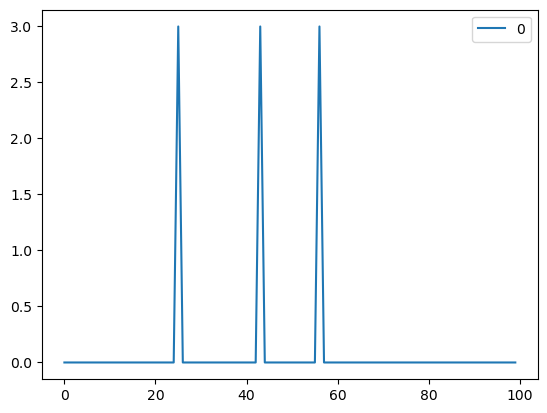

In [13]:
pd.DataFrame(tr.data_storage[23231717].iloc[0].histogram).plot()

In [14]:
example_tree = DASHTorsionTree(tree_folder_path="./example_tree_out")

Loading DASH tree data
Loaded 112 trees and data


In [15]:
for branch in example_tree.tree_storage:
    if len(example_tree.tree_storage[branch]) > 1:
        print(f"Branch {branch} has {len(example_tree.tree_storage[branch])} nodes")

Branch 56181818 has 10 nodes
Branch 57171718 has 6 nodes
Branch 39172323 has 5 nodes
Branch 45174417 has 10 nodes
Branch 18171817 has 26 nodes
Branch 74171717 has 8 nodes
Branch 39561717 has 9 nodes
Branch 18183917 has 6 nodes
Branch 17441717 has 10 nodes
Branch 45232322 has 13 nodes
Branch 39171717 has 9 nodes
Branch 23561717 has 9 nodes
Branch 39443918 has 10 nodes
Branch 22171718 has 10 nodes
Branch 18171717 has 8 nodes
Branch 24232323 has 13 nodes
Branch 74181717 has 8 nodes
Branch 17451717 has 10 nodes
Branch 75232246 has 4 nodes
Branch 18181718 has 66 nodes
Branch 23234418 has 9 nodes
Branch 44391718 has 10 nodes
Branch 44171717 has 10 nodes
Branch 23222317 has 26 nodes
Branch 39443917 has 10 nodes
Branch 23235617 has 9 nodes
Branch 18181817 has 107 nodes
Branch 54172322 has 10 nodes
Branch 75232223 has 8 nodes
Branch 18391718 has 6 nodes
Branch 23232322 has 23 nodes
Branch 23391723 has 5 nodes
Branch 54184423 has 9 nodes
Branch 23225622 has 17 nodes
Branch 23232223 has 32 nodes


In [16]:
mol_idx_test = tree_constructor.test_df.mol_index.unique().tolist()

In [17]:
tree_constructor.df.head()

,atomtype,idx_in_mol,mol_index,node_attentions,truth,h_connectivity,connected_atoms,total_connected_attention,atom_feature
1,N,0,0,"[0.05330947405009094, 0.0655702859466466, 0.05...",-0.000223,-1,"[1, 11, 10, 5, 4, 12, 6, 9, 0, 7, 2, 3, 8]",0.548211,44171717
11,C,1,0,"[0.05131562488381837, 0.05943622669517859, 0.0...",0.000376,-1,"[11, 10, 5, 4, 12, 1, 6, 9, 2, 7, 3, 8, 0]",0.490763,45171717
10,C,2,0,"[0.052315673451380156, 0.06099955964410038, 0....",0.000475,-1,"[10, 5, 4, 2, 1, 3, 6, 9, 0, 11, 8, 12, 7]",0.327488,17451717
5,C,3,0,"[0.052359915679327206, 0.06584512757291977, 0....",-0.001387,-1,"[5, 4, 2, 1, 3, 6, 0, 11, 12, 10, 9, 8, 7]",0.412529,44174517
4,N,4,0,"[0.05198067187032718, 0.07177987708876787, 0.0...",0.0016,-1,"[4, 2, 1, 11, 3, 12, 0, 10, 9, 5, 6, 7, 8]",0.670198,45174417


In [18]:
from serenityff.torsion.tree.dash_utils import get_canon_torsion_feature

In [19]:
af1, af2, af3, af4 = [AtomFeatures.atom_features_from_molecule(mol_supplier[0], atom_i) for atom_i in [2, 1, 3, 4]]

In [20]:
print(af1, af2, af3, af4)

17 44 54 45


In [21]:
get_canon_torsion_feature(af1, af2, af3, af4)

45544417

In [22]:
matched_node_path = example_tree.match_new_atom(atom=[2, 1, 3, 4], mol=mol_supplier[1])

In [23]:
matched_node_path

[57171718, 0, 1, 2, 3, 4, 5]

In [24]:
example_tree.get_atom_properties(matched_node_path=matched_node_path)

level                                                            6
atom_type                                                       39
con_atom                                                         3
con_type                                                         4
max_attention                                             0.070568
size                                                             1
histogram        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: 5, dtype: object

In [25]:
test_mol = mol_supplier[8]
drawMol3D(test_mol, size=(400,400))

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [26]:
def draw_torsion_histogram(node_path, i):
    hist_data = np.array(example_tree.data_storage[node_path[0]].iloc[node_path[i]]["histogram"])
    max_freq = max(hist_data)
    hist_data = hist_data / max_freq
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.plot(np.linspace(-180, 180, len(hist_data)), hist_data, color="C2")
    ax.set_xlim(-180, 180)
    ax.set_ylim(0, 1.1)
    ax.set_xlabel("Torsion angle (degrees)")
    ax.set_ylabel("Likelihood")
    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_xticklabels(["-180", "-90", "0", "90", "180"])
    # draw grid lines for x = -90, 0, 90
    ax.grid(axis="x", color="black", linestyle="--", linewidth=0.5)
    plt.show()

In [27]:
node_path = example_tree.match_new_torsion(atoms_in_torsion=[7,8,9,10], mol=test_mol)
print(node_path)

[23232323, 0, 15, 16, 17, 18, 19, 20, 21, 22]


In [28]:
interact(draw_torsion_histogram, node_path=fixed(node_path), i=ipywidgets.IntSlider(min=1, max=len(node_path)-1, step=1, value=1, description="Node"))

interactive(children=(IntSlider(value=1, description='Node', max=9, min=1), Output()), _dom_classes=('widget-i…

<function __main__.draw_torsion_histogram(node_path, i)>

In [29]:
#rmtree(out_folder)